In [84]:
import os
import numpy as np
import argparse
import cv2
import glob

In [85]:
def main():
    parser = argparse.ArgumentParser()
    parser.add_argument('TestTest', type=str, help='C:/Users/petar/Desktop/TestTest.MP4')
    parser.add_argument('OutputFrames', type=str, help='C:/Users/petar/Desktop/outputframes2')
    args = parser.parse_args()

In [86]:
cap = cv2.VideoCapture('C:/Users/petar/Desktop/TestTest.MP4')
path_to_save = os.path.abspath('C:/Users/petar/Desktop/outputframes2')
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")


In [ ]:

current_frame=1
if (cap.isOpened()== False):
    print('Cap is not open')
while(cap.isOpened()):
    ret, frame = cap.read()
    if(ret==True):
        faces = classifier.detectMultiScale(
        frame,  
        scaleFactor=1.05,
        minNeighbors=20, 
        minSize=(100, 100) 
        ) 
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h),(0,0,255),thickness=2)
            sub_face = frame[y:y+h, x:x+w]
        name = 'frame' + str(current_frame) + '.jpg'
        print(f'Creating: {name}')
        cv2.imwrite(os.path.join('C:/Users/petar/Desktop/outputframes2', name), sub_face)
        current_frame +=1
    else:
        break
cap.release()
print('done')

    

Creating: frame1.jpg
Creating: frame2.jpg
Creating: frame3.jpg
Creating: frame4.jpg
Creating: frame5.jpg
Creating: frame6.jpg
Creating: frame7.jpg
Creating: frame8.jpg
Creating: frame9.jpg
Creating: frame10.jpg
Creating: frame11.jpg
Creating: frame12.jpg
Creating: frame13.jpg
Creating: frame14.jpg
Creating: frame15.jpg
Creating: frame16.jpg
Creating: frame17.jpg
Creating: frame18.jpg
Creating: frame19.jpg
Creating: frame20.jpg
Creating: frame21.jpg
Creating: frame22.jpg
Creating: frame23.jpg
Creating: frame24.jpg
Creating: frame25.jpg
Creating: frame26.jpg
Creating: frame27.jpg
Creating: frame28.jpg
Creating: frame29.jpg
Creating: frame30.jpg
Creating: frame31.jpg
Creating: frame32.jpg
Creating: frame33.jpg
Creating: frame34.jpg
Creating: frame35.jpg
Creating: frame36.jpg
Creating: frame37.jpg
Creating: frame38.jpg
Creating: frame39.jpg
Creating: frame40.jpg
Creating: frame41.jpg
Creating: frame42.jpg
Creating: frame43.jpg
Creating: frame44.jpg
Creating: frame45.jpg
Creating: frame46.j

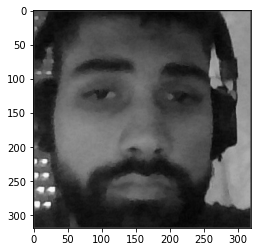

In [78]:
import matplotlib.pyplot as plt
DATA='C:/Users/petar/Desktop/outputframes2'
for frame in DATA:
    path = os.path.join(DATA) 
    for img in os.listdir(path): 
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

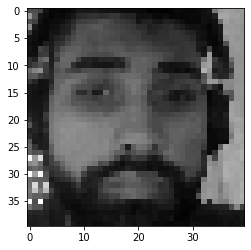

In [79]:
IMG_SIZE=40
new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
plt.imshow(new_array, cmap= 'gray')
plt.show() 

In [80]:
from tqdm import tqdm
FacesData= []

def create_FacesData(): 
        path = os.path.join(DATA)
        for img in tqdm(os.listdir(path)): 
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
                new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                FacesData.append([new_array]) 
create_FacesData()

100%|█████████████████████████████████████████████████████████████████████████████| 1020/1020 [00:05<00:00, 199.54it/s]


In [81]:
print(len(FacesData))

1020


In [82]:
Faces=[]
for features in FacesData:
    Faces.append(features)
Faces=np.array(Faces).reshape(-1,IMG_SIZE, IMG_SIZE, 1)
Faces=Faces/255

In [83]:

import pickle
pickle_out = open("Faces.pickle", "wb")
pickle.dump(Faces, pickle_out)
pickle_out.close()